## EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Comenzamos importando todos los datos que se van a emplear.

In [7]:
milan_acc = pd.read_csv("../datos/accommodations_milan.csv", index_col=0)
budapest_acc = pd.read_csv("../datos/accommodations_budapest.csv", index_col=0)

budapest_act = pd.read_csv("../datos/budapest_act.csv", index_col=0)
milan_act = pd.read_csv("../datos/milan_act.csv", index_col=0)

budapest_flight = pd.read_csv("../datos/buda_flights.csv", index_col=0)
milan_flight = pd.read_csv("../datos/mila_flights.csv", index_col=0)

En nuestro caso, el cliente que se ha escogido es una familia buscando unas vacaciones. Se consideró a una familia de 4 miebros, 2 adultos y 2 niños, y los destinos son Budapest y Milán. Ya que son unas vacaciones familiares, la extensión de éstas se estableció como 10 días. Las fechas están comprendidas en 2 meses, julio y agosto, ya que coincidirían con las vacaciones del colegio de los niños.

### Vuelos

In [10]:
budapest_flight.head()

,destination,price,carrier_go,duration_go,departure_go,arrival_go,stops_go,carrier_back,duration_back,departure_back,arrival_back,stops_back
0,Budapest,583.00,Wizz Air,190,2025-07-01T20:15:00,2025-07-01T23:25:00,0,Wizz Air,210,2025-07-10T16:00:00,2025-07-10T19:30:00,0
1,Budapest,761.60,Ryanair,185,2025-07-01T16:15:00,2025-07-01T19:20:00,0,Ryanair,200,2025-07-10T16:20:00,2025-07-10T19:40:00,0
2,Budapest,1048.39,Iberia,190,2025-07-01T11:45:00,2025-07-01T14:55:00,0,Iberia,200,2025-07-10T15:35:00,2025-07-10T18:55:00,0
3,Budapest,748.75,Ryanair,185,2025-07-01T16:15:00,2025-07-01T19:20:00,0,Wizz Air,210,2025-07-10T16:00:00,2025-07-10T19:30:00,0
4,Budapest,1048.39,Iberia,190,2025-07-01T11:45:00,2025-07-01T14:55:00,0,Iberia,200,2025-07-10T19:40:00,2025-07-10T23:00:00,0


In [9]:
milan_flight.head()

,destination,price,carrier_go,duration_go,departure_go,arrival_go,stops_go,carrier_back,duration_back,departure_back,arrival_back,stops_back
0,Milan Malpensa,308.00,Wizz Air Malta,135,2025-07-01T09:15:00,2025-07-01T11:30:00,0,Wizz Air Malta,150,2025-07-10T06:00:00,2025-07-10T08:30:00,0
1,Milan Malpensa,335.92,Ryanair,130,2025-07-01T20:00:00,2025-07-01T22:10:00,0,Ryanair,145,2025-07-10T10:15:00,2025-07-10T12:40:00,0
2,Milan Bergamo,351.92,Ryanair,135,2025-07-01T06:30:00,2025-07-01T08:45:00,0,Ryanair,145,2025-07-10T22:30:00,2025-07-11T00:55:00,0
3,Milan Bergamo,351.92,Ryanair,135,2025-07-01T06:30:00,2025-07-01T08:45:00,0,Ryanair,145,2025-07-10T10:15:00,2025-07-10T12:40:00,0
4,Milan Malpensa,379.92,Ryanair,130,2025-07-01T20:00:00,2025-07-01T22:10:00,0,Ryanair,145,2025-07-10T14:40:00,2025-07-10T17:05:00,0


In [45]:
datecols = budapest_flight.columns[budapest_flight.columns.str.contains("departure|arrival")]
# budapest_flight[datecols] = budapest_flight[datecols].map(pd.to_datetime)
budapest_flight["day_of_depart"] = budapest_flight["departure_go"].map(lambda x: x.day_name())
budapest_flight["day_of_arrival"] = budapest_flight["arrival_back"].map(lambda x: x.day_name())


In [56]:
datecols = milan_flight.columns[milan_flight.columns.str.contains("departure|arrival")]
# milan_flight[datecols] = milan_flight[datecols].map(pd.to_datetime)
milan_flight["day_of_depart"] = milan_flight["departure_go"].map(lambda x: x.day_name())
milan_flight["day_of_arrival"] = milan_flight["arrival_back"].map(lambda x: x.day_name())
milan_flight["destination"] = "Milan"

In [119]:
both_flight = pd.concat([budapest_flight, milan_flight])
both_flight["day_of_depart"] = pd.Categorical(both_flight["day_of_depart"], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
both_flight["month"] = both_flight["departure_go"].map(lambda x: x.month_name())
both_flight.head()

,destination,price,carrier_go,duration_go,departure_go,arrival_go,stops_go,carrier_back,duration_back,departure_back,arrival_back,stops_back,day_of_depart,day_of_arrival,month
0,Budapest,583.00,Wizz Air,190,2025-07-01 20:15:00,2025-07-01 23:25:00,0,Wizz Air,210,2025-07-10 16:00:00,2025-07-10 19:30:00,0,Tuesday,Thursday,July
1,Budapest,761.60,Ryanair,185,2025-07-01 16:15:00,2025-07-01 19:20:00,0,Ryanair,200,2025-07-10 16:20:00,2025-07-10 19:40:00,0,Tuesday,Thursday,July
2,Budapest,1048.39,Iberia,190,2025-07-01 11:45:00,2025-07-01 14:55:00,0,Iberia,200,2025-07-10 15:35:00,2025-07-10 18:55:00,0,Tuesday,Thursday,July
3,Budapest,748.75,Ryanair,185,2025-07-01 16:15:00,2025-07-01 19:20:00,0,Wizz Air,210,2025-07-10 16:00:00,2025-07-10 19:30:00,0,Tuesday,Thursday,July
4,Budapest,1048.39,Iberia,190,2025-07-01 11:45:00,2025-07-01 14:55:00,0,Iberia,200,2025-07-10 19:40:00,2025-07-10 23:00:00,0,Tuesday,Thursday,July


Una métrica que podemos crear rápidamente es una comparativa general de los precios de los vuelos a ambos destinos.

In [73]:
flight_mean_price = both_flight.groupby(["destination"])[["price"]].mean()

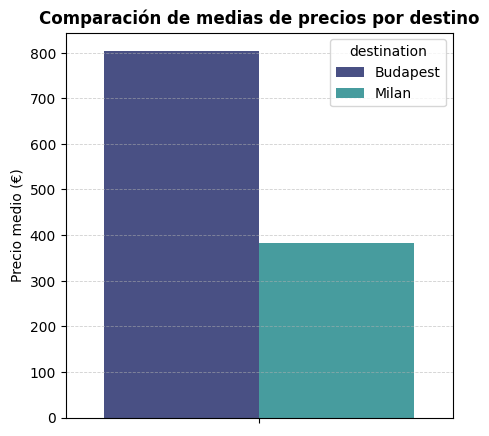

In [111]:
plt.figure(figsize=(5,5))
plt.grid(ls = "--", lw = 0.6, alpha = 0.6)
plt.title("Comparación de medias de precios por destino", fontweight = "bold")
sns.barplot(data = flight_mean_price, y = "price", hue = "destination", palette="mako")
plt.ylabel("Precio medio (€)")
plt.show()

Y a partir de aquí podemos hacer un breakdown por día de la semana.

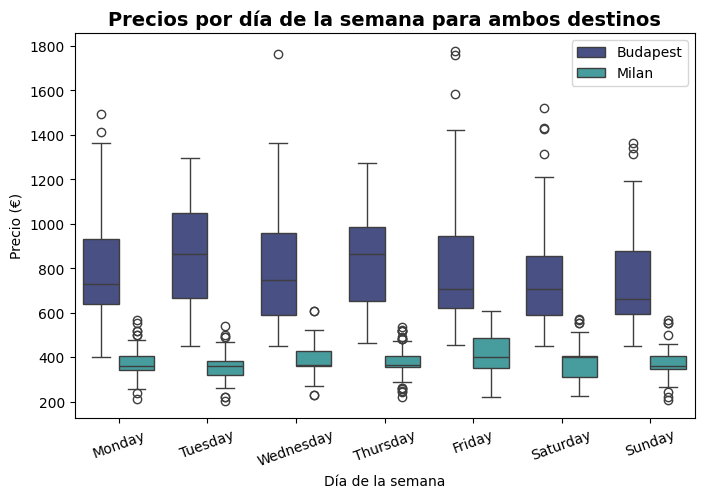

In [112]:
plt.figure(figsize=(8,5))
plt.title("Precios por día de la semana para ambos destinos", fontsize = 14, fontweight = "bold")
sns.boxplot(data=both_flight, y = "price", x = "day_of_depart", hue = "destination", palette="mako")
plt.xlabel("Día de la semana")
plt.ylabel("Precio (€)")
plt.xticks(rotation = 20)
plt.legend()
plt.show()

Vemos claramente que el precio de viajar a Milán está muy por debajo de lo que cuesta ir hasta Budapest. Además en ambos casos se ve que el día que es más caro volar es el viernes.

Vamos a analizar ahora los precios por mes y por destino.

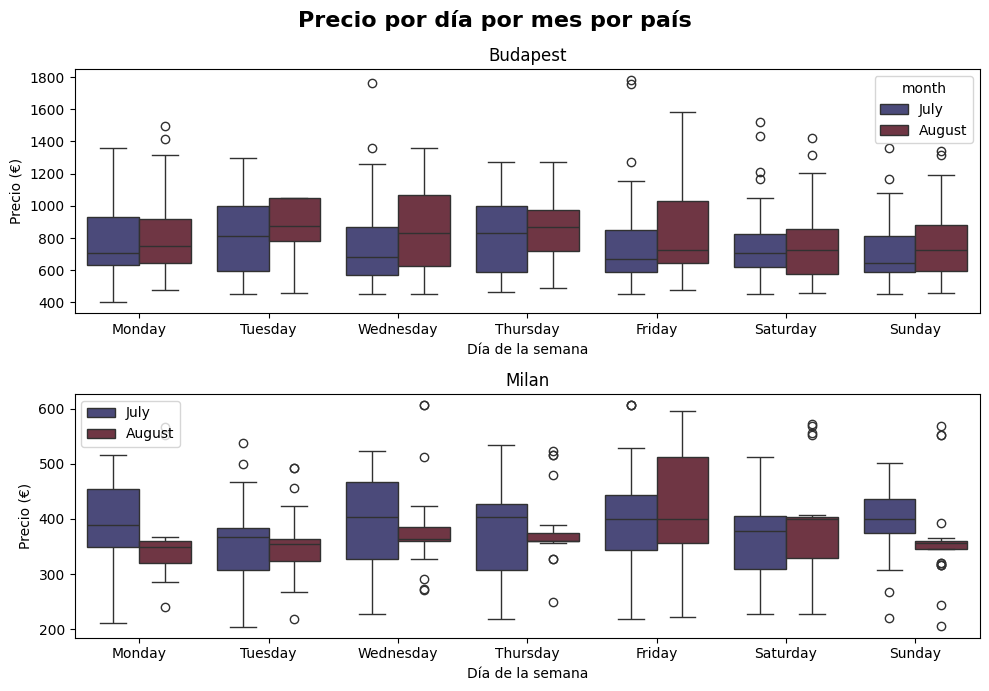

In [143]:
destinations = ["Budapest", "Milan"]
fig, axes = plt.subplots(2, figsize = (10,7))
plt.suptitle("Precio por día por mes por país", fontsize = 16, fontweight = "bold")
for i in range(2):
    axes[i].set_title(destinations[i])
    sns.boxplot(data=both_flight[both_flight["destination"]==destinations[i]], y = "price", x = "day_of_depart", 
                ax = axes[i], hue = "month", palette="icefire")
    axes[i].set_xlabel("Día de la semana")
    axes[i].set_ylabel("Precio (€)")
plt.legend()
plt.tight_layout()
plt.show()

Vemos cómo los datos de los vuelos de Budapest no presentan tanta dispersión como sí tienen los datos de Milán. Esto indica que los precios de estos suelen estar alrededor del mismo. Vemos que Budapest tiende a encarecerse en Agosto, siendo los viernes el día más caro. Mientras tanto Milán tiende a ser más caro en Julio, sin tener en cuenta algunos valores atípicos debido a la alta dispersión. En este caso los viernes sigue siendo el día más caro, y un viernes en Agosto es más caro que cualquier otro día de cualquiera de los dos meses.

Hemos de considerar también que estos precios son de ida y vuelta, por lo que el billete de vuelta también jugaría un papel importante en el importe final.

A continuación veremos si tiene sentido coger vuelos con más escalas para ahorrar algo de dinero.

In [148]:
both_flight["total_stops"] = both_flight["stops_go"] + both_flight["stops_back"] 

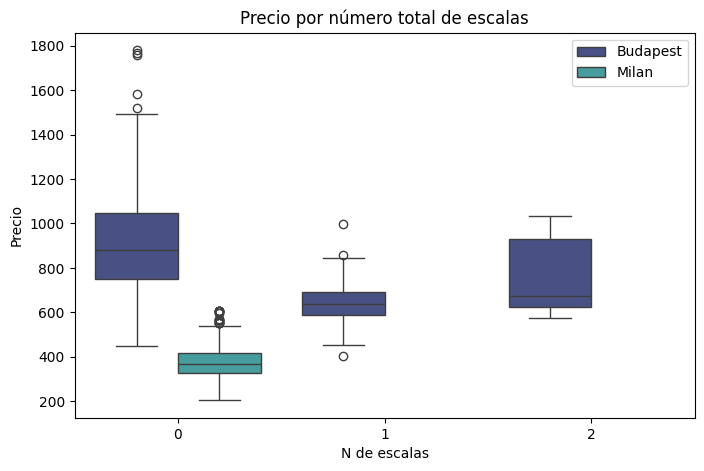

In [156]:
plt.figure(figsize=(8,5))
plt.title("Precio por número total de escalas")
sns.boxplot(data = both_flight, y = "price", x = "total_stops", hue = "destination", palette="mako")
plt.xlabel("N de escalas")
plt.ylabel("Precio")
plt.legend()
plt.show()

Vemos que para Milan no tenemos vuelos con escalas (podría tener sentido ya que hemos cogido resultados limitados y está más cerca de España). Además se observa que para viajar a Budapest, en el caso de tomar 1 escala la mayoría de los billetes bajan de precio, pero por otro lado, 2 escalas no reduce el precio, más bien lo aumenta (eso sí, más barato que sin escalas.)

Ahora podemos ver qué compañías ofrecen un mejor precio, relacionado con la duración de los vuelos (de ida)

In [193]:
both_metrics = both_flight.groupby(["destination","carrier_go"])[["duration_go", "price"]].agg(["mean", "median"])
both_metrics["value_index"] = round(100000 / (both_metrics[("duration_go", "mean")] * both_metrics[("price", "mean")]), ndigits=3)

both_metrics.sort_values("value_index", ascending=False)

duration_go              price           \
                                     mean median        mean   median   
destination carrier_go                                                  
Milan       Wizz Air Malta     135.000000  135.0  331.702041  345.920   
            Iberia             130.000000  130.0  372.235721  360.750   
            Ryanair            131.812950  130.0  428.965252  443.920   
            Air Europa         125.000000  125.0  536.520000  536.520   
Budapest    Wizz Air           190.000000  190.0  677.416481  620.395   
            Ryanair            199.807692  185.0  753.460000  753.210   
            Lufthansa          315.000000  315.0  736.120000  736.120   
            Wizz Air Malta     356.363636  340.0  692.015455  639.210   
            Iberia             263.087432  190.0  948.015956  938.580   
            Air Europa         355.454545  340.0  710.788182  714.130   
            ITA Airways        330.000000  330.0  772.110000  767.510   
            Air Serbia         472.500000  445.0  621.102500  602.780   
            Brussels Airlines  325.000000  325.0  908.758571  931.640   
            TAP Air Portugal   435.000000  435.0  781.320000  781.320   

                              value_index  
                                           
destination carrier_go                     
Milan       Wizz Air Malta          2.233  
            Iberia                  2.067  
            Ryanair                 1.769  
            Air Europa              1.491  
Budapest    Wizz Air                0.777  
            Ryanair                 0.664  
            Lufthansa               0.431  
            Wizz Air Malta          0.405  
            Iberia                  0.401  
            Air Europa              0.396  
            ITA Airways             0.392  
            Air Serbia              0.341  
            Brussels Airlines       0.339  
            TAP Air Portugal        0.294

Ya que son destinos diferentes, hay que considerar los dos casos por separado. En el caso de Milán, *Wizz Air Malta* tiene un índice de valor más alto, lo cual indica mayor rentabilidad, seguido de *Iberia*. En otras palabras, es el que ofrece vuelos más cortos por menor precio.

En Budapest, se observa que *Wizz Air* es la que mejor puntuación obtiene bajo esta métrica, seguido de *Ryanair*.

In [194]:
both_metrics = both_flight.groupby(["destination","carrier_back"])[["duration_back", "price"]].agg(["mean", "median"])
both_metrics["value_index"] = round(100000 / (both_metrics[("duration_back", "mean")] * both_metrics[("price", "mean")]), ndigits=3)

both_metrics.sort_values("value_index", ascending=False)

duration_back               price            \
                                       mean median         mean    median   
destination carrier_back                                                    
Milan       Wizz Air Malta       150.000000  150.0   286.305444   299.500   
            Iberia               142.513514  145.0   378.964649   363.700   
            Air Europa           140.000000  140.0   435.397692   452.670   
            Ryanair              145.000000  145.0   437.429408   441.920   
Budapest    Ryanair              217.403846  200.0   764.185962   749.460   
            Wizz Air             268.266423  210.0   696.188431   657.655   
            Iberia               200.000000  200.0  1104.277238  1048.390   
            Brussels Airlines    318.750000  320.0   931.365000   931.640   
            Lufthansa            310.000000  310.0  1009.000000  1009.000   
            Air Serbia           505.000000  475.0   649.572500   628.090   

                              value_index  
                                           
destination carrier_back                   
Milan       Wizz Air Malta          2.329  
            Iberia                  1.852  
            Air Europa              1.641  
            Ryanair                 1.577  
Budapest    Ryanair                 0.602  
            Wizz Air                0.535  
            Iberia                  0.453  
            Brussels Airlines       0.337  
            Lufthansa               0.320  
            Air Serbia              0.305

En el caso de vuelos de vuelta vemos unos resultados similares en Milán, liderado por *Wizz Air Malta* y seguido por *Iberia* (aunque ya no están tan cerca), mientras que en Budapest vemos que *Ryanair* ofrece un mejor valor bajo estos criterios, aun costando más que el segundo puesto.

### Alojamientos